<a href="https://colab.research.google.com/github/karishmasd/Neural_Networks/blob/main/Python_basics_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
test="Hello World"
print(test)
print("test:",test)

Hello World
test: Hello World


#Sigmoid function -  math.exp() & np.exp()

math.exp()

In [4]:
import math
def basic_sigmoid(x):
  sigmoid=1/(1+math.exp(-x))
  return sigmoid
print("basic_sigmoid(1) "+str(basic_sigmoid(1)))

basic_sigmoid(1) 0.7310585786300049


Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful.In fact, if  𝑥=(𝑥1,𝑥2,...,𝑥𝑛)
  is a row vector then np.exp(x) will apply the exponential function to every element of x. The output will thus be: np.exp(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})

In [9]:
import numpy as np
x=np.array([1,6,9])
print(np.exp(x))

[2.71828183e+00 4.03428793e+02 8.10308393e+03]


In [10]:
def sigmoid(x):
  sigmoid=1/(1+np.exp(-x))
  return sigmoid
print("sigmoid(x)"+ str(sigmoid(x)))

sigmoid(x)[0.73105858 0.99752738 0.99987661]


#Sigmoid Gradient
𝑠𝑖𝑔𝑚𝑜𝑖𝑑_𝑑𝑒𝑟𝑖𝑣𝑎𝑡𝑖𝑣𝑒(𝑥)=𝜎′(𝑥)=𝜎(𝑥)(1−𝜎(𝑥))


In [11]:
ds=sigmoid(x)*(1-sigmoid(x))
print("ds"+str(ds))

ds[1.96611933e-01 2.46650929e-03 1.23379350e-04]


In [18]:
def sigmoid_derivative(x):
  s=1/(1+np.exp(-x))
  ds=s*(1-s)
  return ds
print("sigmoid_derivative(x):"+str(sigmoid_derivative(x)))

sigmoid_derivative(x):[1.96611933e-01 2.46650929e-03 1.23379350e-04]


#Reshaping arrays

Two common numpy functions used in deep learning are np.shape and np.reshape().

X.shape is used to get the shape (dimension) of a matrix/vector X.



X.reshape(...) is used to reshape X into some other dimension.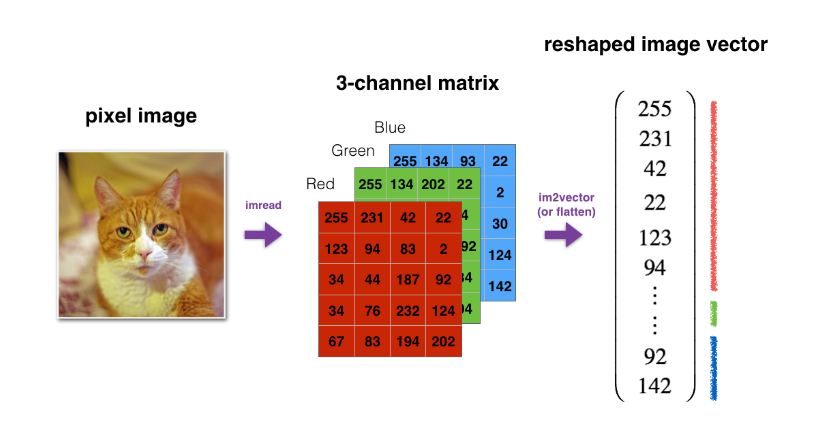

In [21]:
def image2vector(image):
  #image is a numpy array of (length,height , depth )
  v=image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
  return v
image= np.random.randn(3, 3, 2)
print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[-0.58511268]
 [ 1.48831686]
 [-0.65311629]
 [ 0.48337535]
 [-0.76550008]
 [-1.22771392]
 [-0.75328702]
 [ 1.12368946]
 [ 0.99261615]
 [ 1.42430532]
 [-1.02839973]
 [-1.85764263]
 [-0.73684424]
 [ 0.3853107 ]
 [-1.039185  ]
 [-1.41053321]
 [ 0.73283575]
 [ 0.98635719]]


#Normalizing rows
Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to  𝑥‖𝑥‖
  (dividing each row vector of x by its norm).

In [28]:
def normalized_rows(x):
  x_norm=np.linalg.norm(x,axis=1,keepdims=True) #linalg is short form of linear algebra
  #keepdims: Without keepdims=True, the dimension corresponding to the summation axis would be removed from the output array x_sum. For example, if x is a 2-dimensional array with shape (3, 4), applying np.sum(x, axis=1) would result in a 1-dimensional array with shape (3,).
  print(np.shape(x_norm))
  x=x/x_norm
  return x
x=np.random.randn(3,3)
print((normalized_rows(x)))


(3, 1)
[[-0.76080029 -0.62919613 -0.15904451]
 [ 0.02139598 -0.81178374  0.58356608]
 [-0.75977325  0.26643808  0.59308967]]


#Softmax
softmax is a normalizing function used when your algorithm needs to classify two or more classes.
𝑠𝑜𝑓𝑡𝑚𝑎𝑥(𝑥)=𝑠𝑜𝑓𝑡𝑚𝑎𝑥([𝑥1𝑥2...𝑥𝑛])=[𝑒𝑥1∑𝑗𝑒𝑥𝑗𝑒𝑥2∑𝑗𝑒𝑥𝑗...𝑒𝑥𝑛∑𝑗𝑒𝑥𝑗]

In [32]:
def softmax(x):
  x_exp=np.exp(x)
  x_sum=np.sum(x_exp,axis=1,keepdims=True)
  s=x_exp/x_sum
  return s
x=np.array([[1,2,3,4,4,5],[2,3,4,5,6,6]])
print(softmax(x))

[[0.00944496 0.02567407 0.06978935 0.18970711 0.18970711 0.5156774 ]
 [0.00712306 0.01936247 0.05263266 0.14307041 0.3889057  0.3889057 ]]


#Loss functions